In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint
import warnings
warnings.simplefilter("ignore")

1. Write code to solve the following system of ordinary differential equations using the Python function odeint.

$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$

Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$.

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

In [2]:
# model for each of the exact solutions
x1t = lambda t : np.exp(-t*0.5)
x2t = lambda t : -2*np.exp(-t*0.5) + 3*np.exp(-t*0.25)
x3t = lambda t: 1.5*np.exp(-t*0.5) - 9*np.exp(-t*0.25) + 8.5*np.exp(-t*1/6)

In [3]:
# plotting function
def plot(time, exact, approximate, label, title, abs_er):
    
    # plot for exact vs approximation
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.plot(time, exact, linewidth = 8, label="Exact")
    plt.plot(time, approximate, linewidth = 6, linestyle='--', label=label)
    plt.xlabel('time')
    plt.ylabel('X')
    plt.title(title)
    plt.legend()
    
    
    # plot for absolute error
    plt.subplot(1,2,2)
    plt.plot(time, abs_er)
    plt.title('Absolute error')
    plt.xlabel('time')
    plt.ylabel("error")

In [4]:
# common variables
a, b = [0, 1]
h = 0.01
N = int((b-a)/h + 1)
t = np.linspace(0, 1, N)
x0 = np.array([1, 1, 1])

## Using Odeint

In [5]:
# function that returns dz/dt
def model(x, t):
    x1, x2, x3 = x
    dx1dt = -0.5*x1
    dx2dt = 0.5*x1 - 0.25*x2
    dx3dt = 0.25*x2 - (1/6)*x3
    return np.array([dx1dt, dx2dt, dx3dt])

# solve ODE
x = odeint(model, x0, t)

x1 = x[:, 0]  # for x1
x2 = x[:, 1]  # for x2
x3 = x[:, 2]  # for x3



	   **  Plot of Exact solution, Approximate solution, and the error Using Odeint **



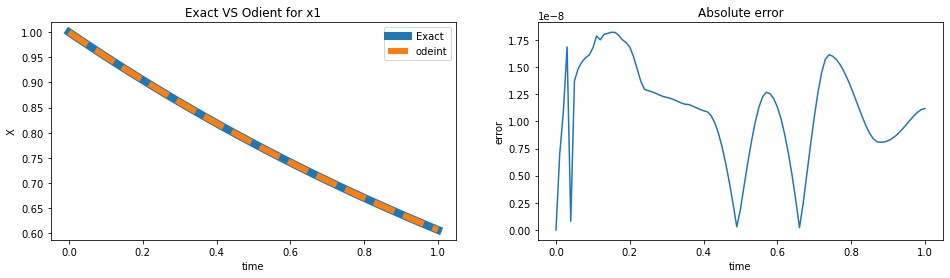

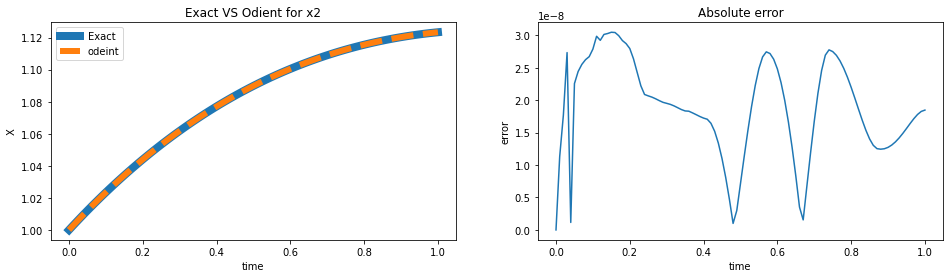

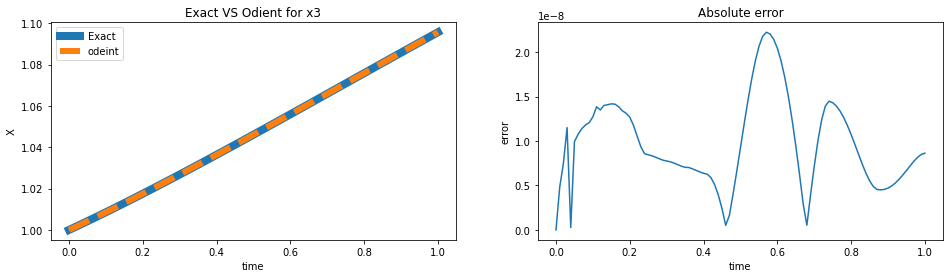

In [6]:
print()
print()
print("\t      ==========================================================================")
print(f"\t   **  Plot of Exact solution, Approximate solution, and the error Using Odeint **")
print("\t      ==========================================================================\n")
plot(t, x1t(t), x1, 'odeint', "Exact VS Odient for x1", abs(x1t(t) - x1)) #
plot(t, x2t(t), x2, 'odeint', "Exact VS Odient for x2", abs(x2t(t) - x2))
plot(t, x3t(t), x3, 'odeint', "Exact VS Odient for x3", abs(x3t(t) - x3))

### Euler Methods

### Explicit

In [7]:
def euler_explict(F, c0,  t):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t)-1):
        X[n+1] = X[n] + h*F(X[n], t[n])
    return X               
                 

#F = lambda t, y : -2*y + 2 - np.exp(-4*t)

euler = euler_explict(model, x0, t)
x_e1 = euler[:,0]
x_e2 = euler[:,1]
x_e3 = euler[:,2]



	   **  Plot of Exact solution, Approximate solution, and the error Using Explicit Euler **



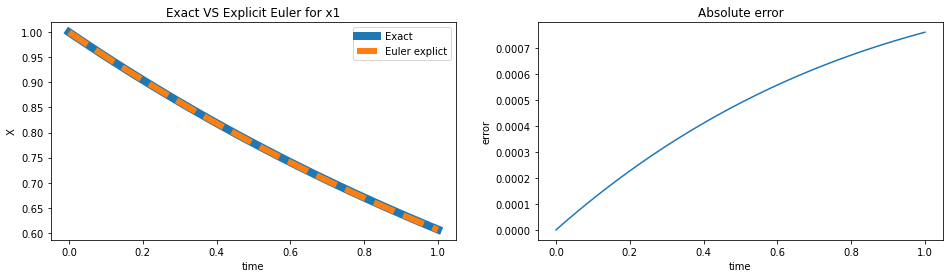

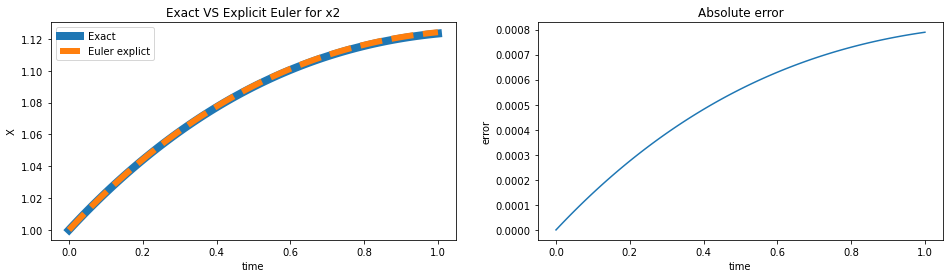

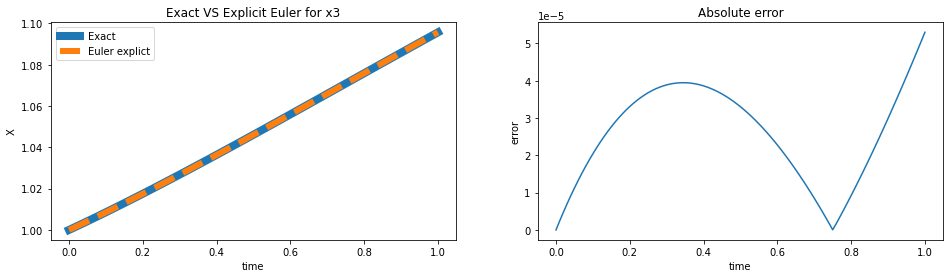

In [8]:
print()
print()
print("\t      =================================================================================")
print(f"\t   **  Plot of Exact solution, Approximate solution, and the error Using Explicit Euler **")
print("\t      ==================================================================================\n")

plot(t, x1t(t), x_e1, 'Euler explict', "Exact VS Explicit Euler for x1", abs(x1t(t) - x_e1))
plot(t, x2t(t), x_e2, 'Euler explict', "Exact VS Explicit Euler for x2", abs(x2t(t) - x_e2))
plot(t, x3t(t), x_e3, 'Euler explict', "Exact VS Explicit Euler for x3", abs(x3t(t) - x_e3))

### Implicit

In [9]:
F1 =  lambda t, x : -0.5*x
# fdx = lambda x: 0.5

In [10]:
def euler_implict(F, c0,  t):
    X = np.zeros((len(t), len(c0)))
    #X = np.zeros(len(t))
    X[0] = c0
    for n in range(len(t) - 1):
        f1 = lambda x : x - X[n] - h*F(x, t[n+1])
        X[n+1] = fsolve(f1, X[n])
    return X


eu = euler_implict(model, x0, t)
eu1_im = eu[:,0]
eu2_im = eu[:,1]
eu3_im = eu[:,2]



	   **  Plot of Exact solution, Approximate solution, and the error Using Implicit Euler **



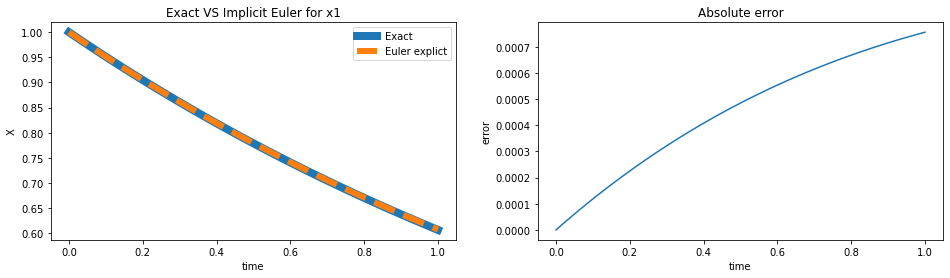

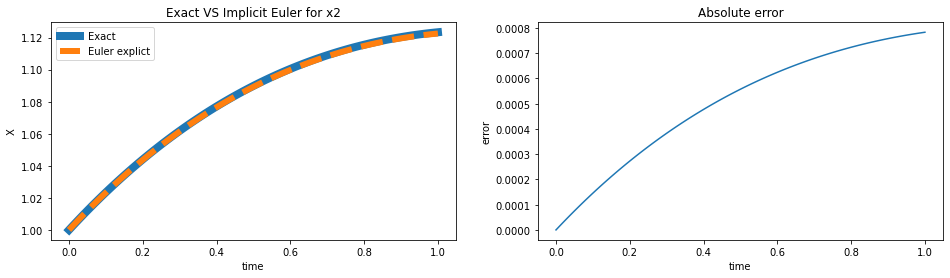

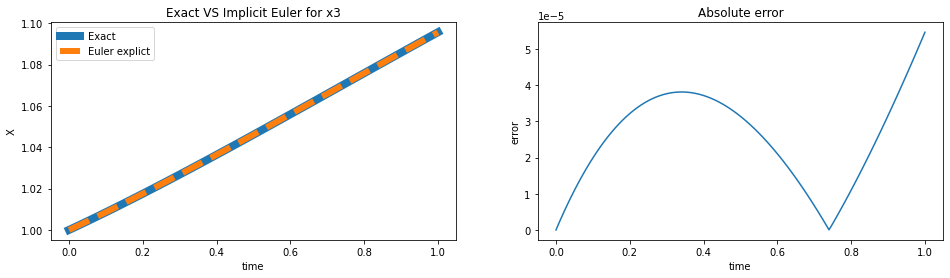

In [11]:
print()
print()
print("\t      =================================================================================")
print(f"\t   **  Plot of Exact solution, Approximate solution, and the error Using Implicit Euler **")
print("\t      ==================================================================================\n")

plot(t, x1t(t), eu1_im, 'Euler explict', "Exact VS Implicit Euler for x1", abs(x1t(t) - eu1_im))
plot(t, x2t(t), eu2_im, 'Euler explict', "Exact VS Implicit Euler for x2", abs(x2t(t) - eu2_im))
plot(t, x3t(t), eu3_im, 'Euler explict', "Exact VS Implicit Euler for x3", abs(x3t(t) - eu3_im))

### Modified Euler method

In [12]:
def modified_euler(F, c0,  t):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t) - 1):
        Xp = X[n] + h*F(X[n], t[n])
        X[n+1] = X[n] + h*F(Xp, t[n+1])
    return X

md_elr = modified_euler(model, x0, t)
md1_e = md_elr[:,0]
md2_e = md_elr[:,1]
md3_e = md_elr[:,2]



	   **  Plot of Exact solution, Approximate solution, and the error Using Modified Euler **



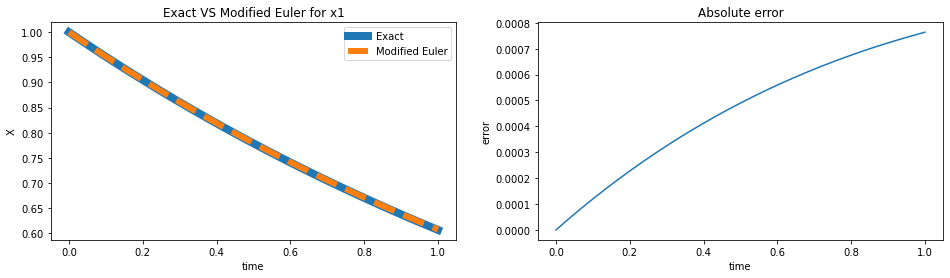

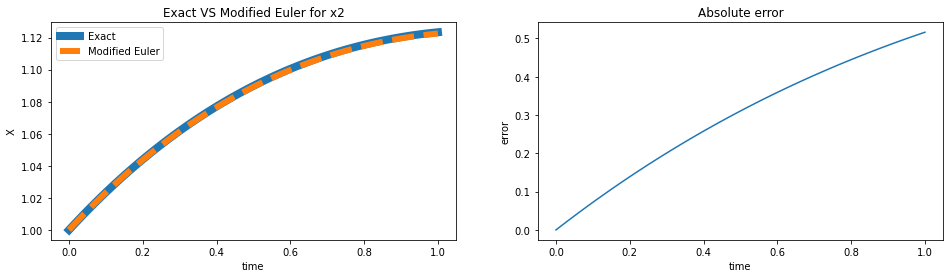

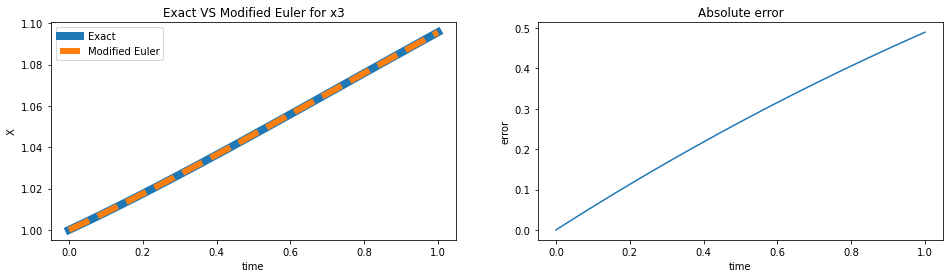

In [13]:
print()
print()
print("\t      ==================================================================================")
print(f"\t   **  Plot of Exact solution, Approximate solution, and the error Using Modified Euler **")
print("\t      ===================================================================================\n")

plot(t, x1t(t), md1_e, 'Modified Euler', "Exact VS Modified Euler for x1", abs(x1t(t) - md1_e))
plot(t, x2t(t), md2_e, 'Modified Euler', "Exact VS Modified Euler for x2", abs(x1t(t) - md2_e))
plot(t, x3t(t), md3_e, 'Modified Euler', "Exact VS Modified Euler for x3", abs(x1t(t) - md3_e))

## Trapizoidal methods

### Implict Trapizoidal

In [14]:
def explict_trapz(F, c0,  t):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t) - 1):
        f1 = lambda x: x - X[n] - 0.5*h*(F(X[n], t[n]) + F(x, t[n+1]))
        X[n+1] = fsolve(f1, X[n])
    return X

imp_trap = explict_trapz(model, x0, t)
ip1_t = imp_trap[:, 0]
ip2_t = imp_trap[:, 1]
ip3_t = imp_trap[:, 2]



	   ** Plot of Exact solution, Approximate solution, and the error Using Implict Trapizoidal **



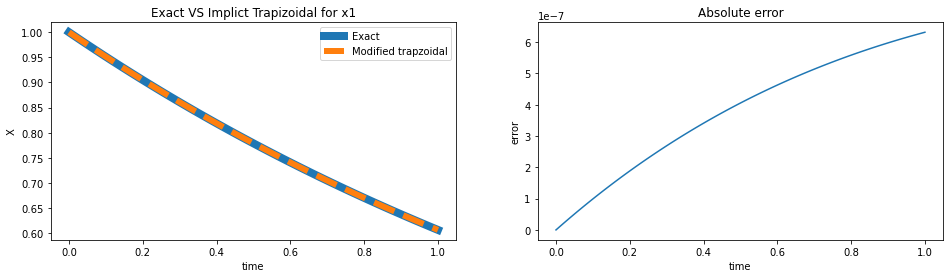

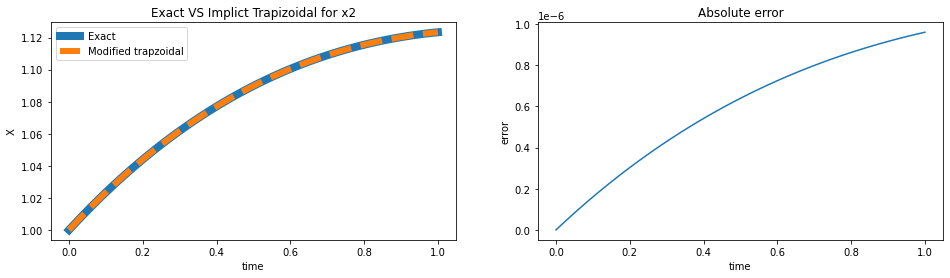

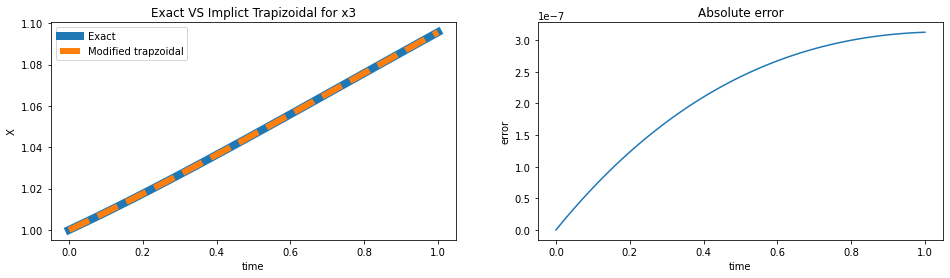

In [15]:
print()
print()
print("\t      =======================================================================================")
print(f"\t   ** Plot of Exact solution, Approximate solution, and the error Using Implict Trapizoidal **")
print("\t      =======================================================================================\n")

plot(t, x1t(t), ip1_t, 'Modified trapzoidal', "Exact VS Implict Trapizoidal for x1", abs(x1t(t) - ip1_t)) 
plot(t, x2t(t), ip2_t, 'Modified trapzoidal', "Exact VS Implict Trapizoidal for x2", abs(x2t(t) - ip2_t)) 
plot(t, x3t(t), ip3_t, 'Modified trapzoidal', "Exact VS Implict Trapizoidal for x3", abs(x3t(t) - ip3_t)) 

### Modified Trapizoidal

In [16]:
def modified_trapz(F, c0, t):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t) - 1):
        Xp = X[n] + h*F(X[n], t[n])
        X[n+1] = X[n] + 0.5*h*(F(X[n], t[n]) + F(Xp, t[n+1]))
    return X

md_tr = modified_trapz(model, x0, t)
md1_tr = md_tr[:,0]
md2_tr = md_tr[:,1]
md3_tr = md_tr[:,2]



	   ** Plot of Exact solution, Approximate solution, and the error Using Modified Trapizoidal **



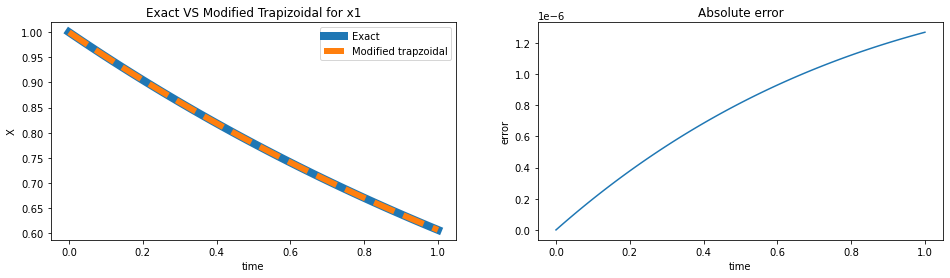

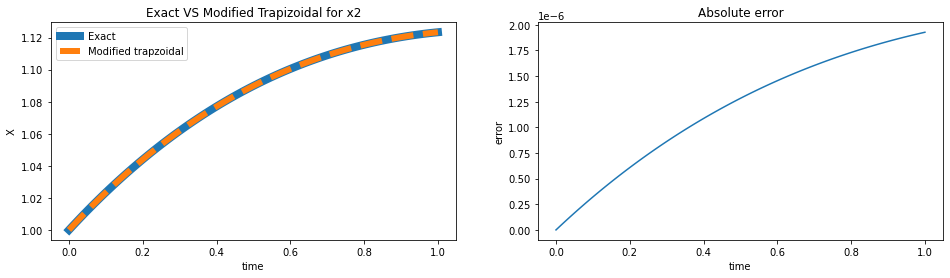

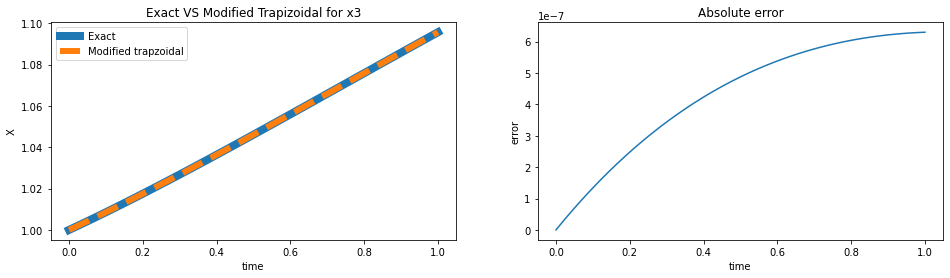

In [17]:
print()
print()
print("\t      =======================================================================================")
print(f"\t   ** Plot of Exact solution, Approximate solution, and the error Using Modified Trapizoidal **")
print("\t      =======================================================================================\n")

plot(t, x1t(t), md1_tr, 'Modified trapzoidal', "Exact VS Modified Trapizoidal for x1", abs(x1t(t) - md1_tr)) 
plot(t, x2t(t), md2_tr, 'Modified trapzoidal', "Exact VS Modified Trapizoidal for x2", abs(x2t(t) - md2_tr)) 
plot(t, x3t(t), md3_tr, 'Modified trapzoidal', "Exact VS Modified Trapizoidal for x3", abs(x3t(t) - md3_tr)) 

## Range kuta Methods

### Second order range kuta

In [18]:
def sec_rangeKuta(F, c0, t, h):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t)-1):
        k1 = h*F(X[n], t[n])
        k2 = h*F(X[n] + 0.5*k1, t[n] + 0.5*h)
        X[n+1] = X[n] + k2
    return X

sec_rng = sec_rangeKuta(model, x0, t, h)
sec1_rn = sec_rng[:,0]
sec2_rn = sec_rng[:,1]
sec3_rn = sec_rng[:,2]



	   ** Plot of Exact solution, Approximate solution, and the error Using 2nd order range kuta **



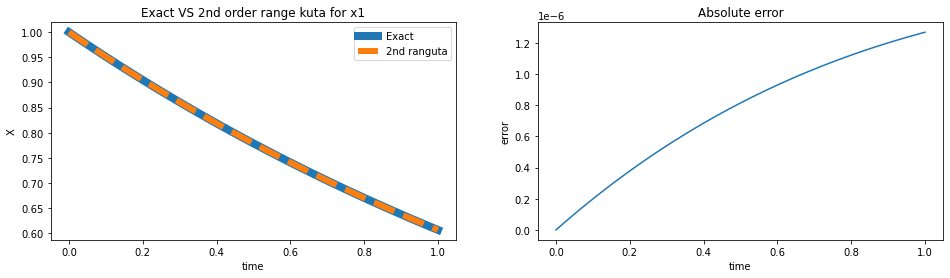

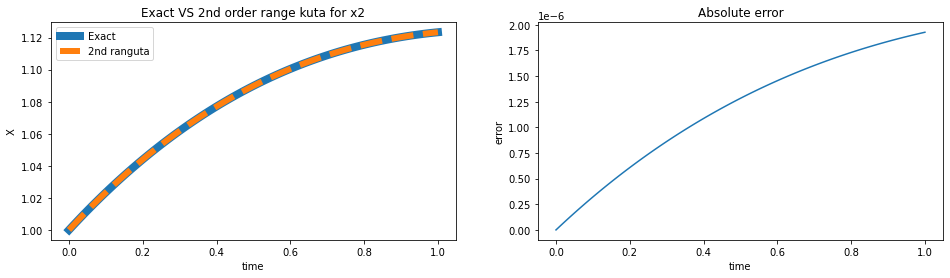

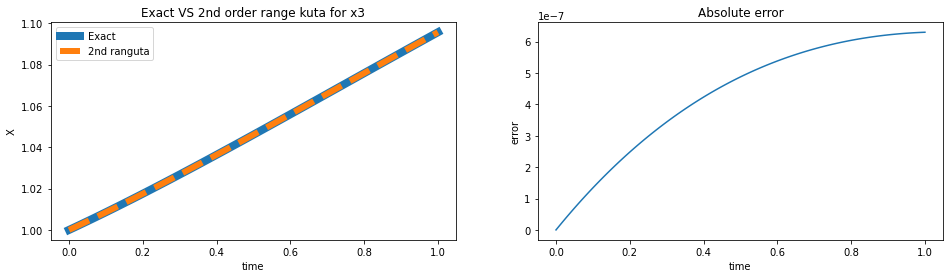

In [19]:
print()
print()
print("\t      =======================================================================================")
print(f"\t   ** Plot of Exact solution, Approximate solution, and the error Using 2nd order range kuta **")
print("\t      =======================================================================================\n")

plot(t, x1t(t), sec1_rn, '2nd ranguta', "Exact VS 2nd order range kuta for x1", abs(x1t(t) - sec1_rn))
plot(t, x2t(t), sec2_rn, '2nd ranguta', "Exact VS 2nd order range kuta for x2", abs(x2t(t) - sec2_rn))
plot(t, x3t(t), sec3_rn, '2nd ranguta', "Exact VS 2nd order range kuta for x3", abs(x3t(t) - sec3_rn))

### Furth order range kuta

In [20]:
def forth_rangeKuta(F, c0, t, h):
    X = np.zeros((len(t), len(c0)))
    X[0] = c0
    for n in range(len(t)-1):
        k1 = h*F(X[n], t[n])
        k2 = h*F(X[n] + 0.5*k1, t[n] + 0.5*h)
        k3 = h*F(X[n] + 0.5*k2, t[n] + 0.5*h)
        k4 = h*F(X[n] + k3, t[n] + h)
        X[n+1] = X[n] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    return X

frz_rng = forth_rangeKuta(model, x0, t, h) 
frz1_rng = frz_rng[:,0]
frz2_rng = frz_rng[:,1]
frz3_rng = frz_rng[:,2]



	  ** Plot of Exact solution, Approximate solution, and the error Using 4th Order range kuta **



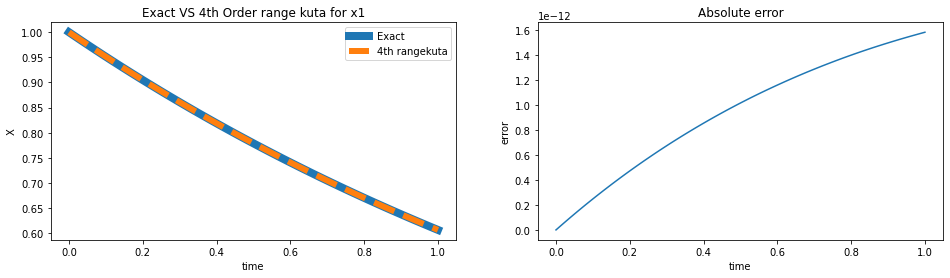

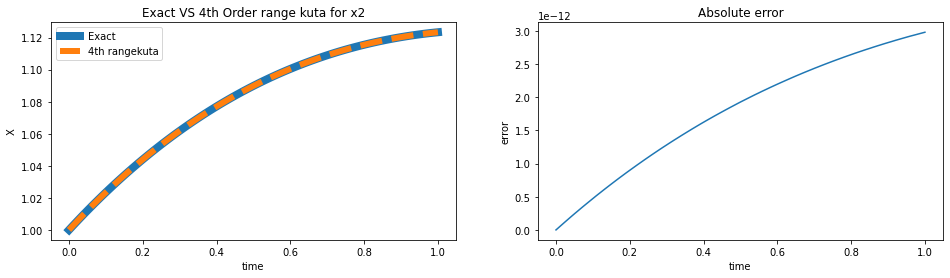

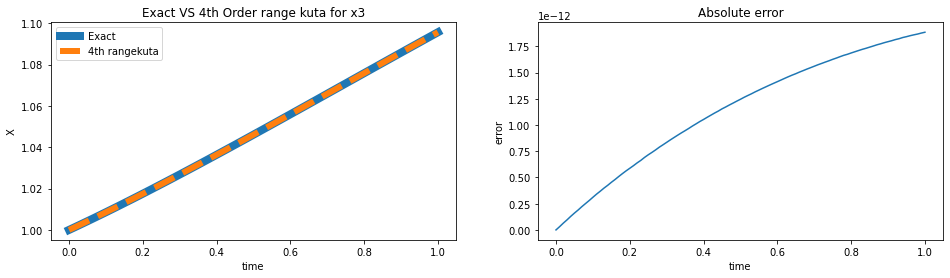

In [21]:
print()
print()
print("\t     =======================================================================================")
print(f"\t  ** Plot of Exact solution, Approximate solution, and the error Using 4th Order range kuta **")
print("\t     =======================================================================================\n")

plot(t, x1t(t), frz1_rng, '4th rangekuta', "Exact VS 4th Order range kuta for x1", abs(x1t(t) - frz1_rng))
plot(t, x2t(t), frz2_rng, '4th rangekuta', "Exact VS 4th Order range kuta for x2", abs(x2t(t) - frz2_rng))
plot(t, x3t(t), frz3_rng, '4th rangekuta', "Exact VS 4th Order range kuta for x3", abs(x3t(t) - frz3_rng))

## Finite difference method

In [22]:
#def finite_diff()